In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
#from tabulate import tabulate

import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("https://cocl.us/datascience_survey_data",index_col=0)

In [3]:
df.head()

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136


In [4]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

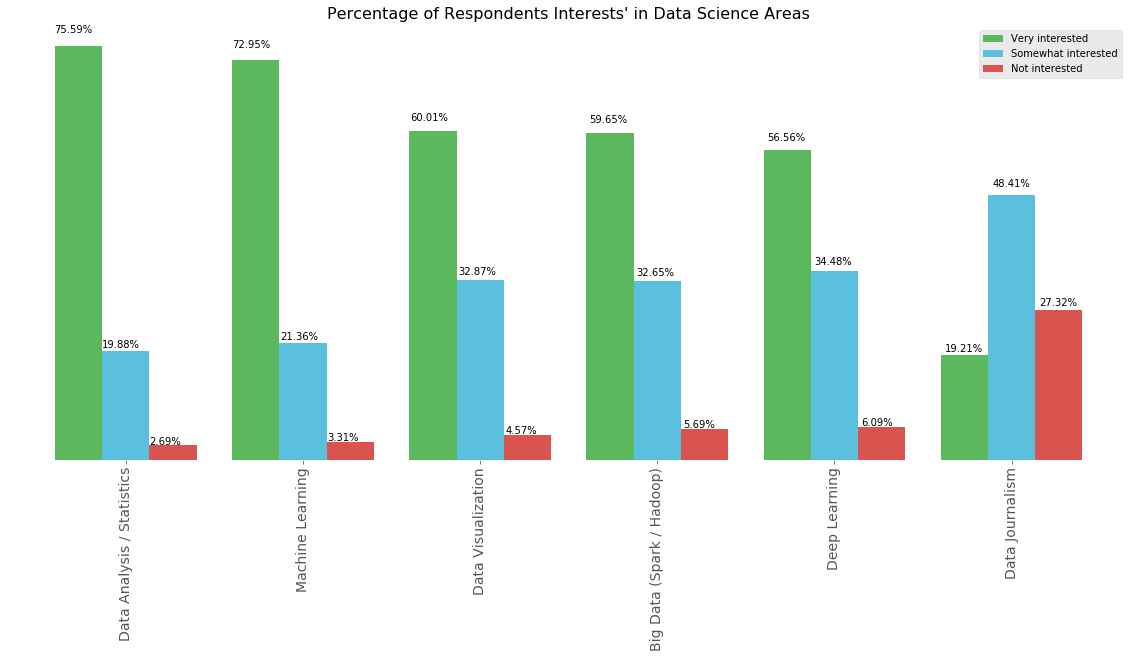

In [8]:
# 1. Sort the dataframe in descending order of Very interested.
df.sort_values(['Very interested'], ascending=False , axis=0 , inplace= True)

# 2. Convert the numbers into percentages of the total number of respondents.
#    Recall that 2,233 respondents completed the survey. 
#    Round percentages to 2 decimal places.
df_pct = ((df/ 2233) * 100).round(2)


ax = df_pct.plot(kind='bar',
                       figsize = (20, 8),
                       width = 0.8,
                       color = ['#5cb85c', '#5bc0de', '#d9534f'],
                       fontsize = 14)

plt.title('Percentage of Respondents Interests\''' in Data Science Areas', fontsize=16) # add title to the plot


# Solution inspired in https://stackoverflow.com/questions/14088687/how-to-change-plot-background-color/23907866
ax.set_facecolor((1.0, 1.0, 1.0))

# Solution inspired in https://stackoverflow.com/questions/40705614/hide-axis-label-only-not-entire-axis-in-pandas-plot
y_axis = ax.axes.get_yaxis()
y_axis.set_visible(False)

# Solution inspired in https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
for p in ax.patches:
    ax.annotate(str(p.get_height()) + '%', (p.get_x() * 1.005, p.get_height() * 1.03))
    
plt.show()

In [9]:
df_sfcrime = pd.read_csv("https://cocl.us/sanfran_crime_dataset")

In [10]:
df_tmp = df_sfcrime.groupby(['PdDistrict']).count().reset_index()
df_tmp.drop(['Category','Descript','DayOfWeek','Date','Time', 'Resolution','Address','X','Y','Location','PdId'], axis=1, inplace=True)
df_tmp.rename(columns={'PdDistrict':'Neighborhood', 'IncidntNum':'Count'}, inplace=True)

In [11]:
df_tmp

,Neighborhood,Count
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


In [16]:


#https://cocl.us/sanfran_geojson
!wget --quiet https://cocl.us/sanfran_geojson -O sanfran_geo.json    
print('GeoJSON file downloaded!')



GeoJSON file downloaded!


'wget' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


In [17]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium
print('Folium installed and imported!')

Solving environment: ...working... done

# All requested packages already installed.

Folium installed and imported!


In [18]:
sf_geo = r'sanfran_geo.json' # geojson file

# create a plain San Francisco map
sf_map = folium.Map(location=[37.773972, -122.431297], zoom_start=12) #, tiles='Mapbox Bright')
sf_map.choropleth(
    geo_data=sf_geo,
    data=df_tmp,
    columns=['Neighborhood','Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='San Francisco Crimes'
)

# display map
sf_map

FileNotFoundError: [Errno 2] No such file or directory: 'sanfran_geo.json'